<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto final** | Python para Análise de Dados
Aluno **Chrystian Coelho de Almeida**

Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# Tópicos

---






1.   Descrição do Projeto
2.   Importação das Bibliotecas
3.   Carregamento dos dados
4.   Exploração
5.   Limpeza e tratamento
6.   Análise e visualização
7.   Resumo dos Insights


# 1\. Descrição do Projeto


---



A proposta do projeto é explorar, limpar e visualizar um conjunto de dados entregue pelo pprofessor responsável. Conjunto este que simula dados relacionados à liberação de crédito para os clientes de uma determinada empresa.

Neste conjunto de dados csv existe o atributo "default", designado à classificação de clientes **adimplentes** (de valor 0) ou **inadimplentes** (de valor 1), para reconhecer quais clientes são ou não próprios para receberem o crédito da empresa. Esta é a váriavel resposta da questão.

> A realização do projeto baseia-se na exploração, limpeza/tratamento e visualização dos dados que podem revelar que fatores tornam um cliente adimplente ou inadimplente.

# 2\. Importação das Bibliotecas

---

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3\. Carregamento dos Dados

---



In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

Aqui temos todos os dados já carregados dentro da variável 'df', utilizando o pacote Pandas

# 4\. Exploração

---



## 4.1. Quantidade de clientes

Com os dados importados e armazenados na variável, agora é possível conhecer algumas características que vão ajudar a alcançar o objetivo.

In [50]:
df.shape # Descobrindo a quantidade de linhas e colunas

(10127, 16)

In [51]:
df[df['default'] == 0].shape # Visualizando a quantidade de linhas e colunas que possuem clientes adimplentes

(8500, 16)

In [52]:
df[df['default'] == 1].shape # Visualizando a quantidade de linhas e colunas que possuem clientes inadimplentes

(1627, 16)

Com estas informações, pode-se calcular a diferença entre clientes adimplentes e inadimplentes

In [53]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default']==0].shape
qtd_inadimplentes, _ = df[df['default']==1].shape

print(f'A diferença entre os clientes adimplentes e inadimplentes é de {qtd_adimplentes - qtd_inadimplentes}')
print(f'A quantidade total de clientes é {qtd_total}, sendo {round(100 * qtd_adimplentes / qtd_total,2)}% adimplentes e {round(100 * qtd_inadimplentes / qtd_total,2)}% inadimplentes')

A diferença entre os clientes adimplentes e inadimplentes é de 6873
A quantidade total de clientes é 10127, sendo 83.93% adimplentes e 16.07% inadimplentes


## 4.2. Observando o Schema

In [54]:
df.head(n=10) # Conferindo as colunas e 10 primeiras linhas do conjunto

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [55]:
df.dtypes # Verificando os tipos de cada coluna

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [56]:
df.select_dtypes('object').describe().transpose() # Verificando os atributos categóricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [57]:
df.drop('id',axis=1).select_dtypes('number').describe().transpose() # Verificando os atributos númericos

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


> Nesta análise, podemos perceber que alguns valores não são o que deveriam. As colunas "limite_credito" e "valor_transacoes_12m" retornaram o tipo "object", sendo que deveriam ser do tipo "float" (tendo em vista que são números quebrados)

> Além disso, a quantidade de atributos em "escolaridade", "estado-civil" e "salario_anual" se divergem em relação ao restante, o que significa que nem todos os clientes possuem estes valores.

## 4.3. Dados faltantes

Como sabemos que existem dados faltando em alguns atributos, podemos fazer alguns testes para verificar a possibilidade de excluir os clientes em questão sem que isso interfira na análise final.

In [58]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

> Observa-se aqui que, como esperado, os dados faltantes estão presentes nos três atributos "escolaridade", "estado_civil" e "salario_anual"

In [59]:
def info_dados_faltantes(df: pd.DataFrame) -> None:

  dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, 'total': total, 'diferenca': total - qtd, 'porcentagem': round(100 * qtd / total,2)}}
      dados_faltantes.append(dict_dados_faltantes)

  for dado in dados_faltantes:
    print(dado)

In [60]:
info_dados_faltantes(df)

{'escolaridade': {'quantidade': 1519, 'total': 10127, 'diferenca': 8608, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'total': 10127, 'diferenca': 9378, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'total': 10127, 'diferenca': 9015, 'porcentagem': 10.98}}


In [61]:
print('Adimplentes')
info_dados_faltantes(df[df['default'] == 0])
print('-----------------------')
print('Inadimplentes')
info_dados_faltantes(df[df['default'] == 1])

Adimplentes
{'escolaridade': {'quantidade': 1263, 'total': 8500, 'diferenca': 7237, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'total': 8500, 'diferenca': 7880, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'total': 8500, 'diferenca': 7575, 'porcentagem': 10.88}}
-----------------------
Inadimplentes
{'escolaridade': {'quantidade': 256, 'total': 1627, 'diferenca': 1371, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'total': 1627, 'diferenca': 1498, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'total': 1627, 'diferenca': 1440, 'porcentagem': 11.49}}


Desta forma, podemos analisar a possibilidade de excluir os dados faltantes sem que isso afete nossa análise final dos dados.

> Como as porcentagens de clientes adimplentes e inadimplentes com dados faltantes são semelhantes (menos de 1% de diferença nos valores), poderemos excluir tais informações sem que isso tenha muito impacto em nossa análise.

# 5\. Limpeza e Tratamento

---



Agora que conhecemos algumas divergências dentro do conjunto de dados, podemos tratá-las para fazermos análises mais precisas e com dados corretos.

Como correções para serem feitas no conjunto, temos:

> Correção dos tipos no schema, para que nosso código e a compreensão funcionem corretamente;

> Limpeza dos dados, removendo os clientes que possuem dados faltantes.

## 5.1. Corrigindo o Schema

In [62]:
df[['limite_credito','valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [63]:
df[['limite_credito','valor_transacoes_12m']].describe().transpose()

,count,unique,top,freq
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Como pode-se perceber, os atributos 'limite_credito' e 'valor_transacoes_12m' possuem valores númericos, mas estão com tipos categóricos iguais a 'object'. Para resolver esse problema, usarei a seguinte função lambda:

In [64]:
df['limite_credito'] = df['limite_credito'].apply(lambda val: float(val.replace('.', '').replace(',', '.')))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda val: float(val.replace('.', '').replace(',', '.')))

# Utilizando o método replace, foi necessário apenas excluir todos os '.' que haviam no número e depois transformar as ',' em '.',
# para que o valor possua o formato reconhecível pelo Python e possa ser convertido em float

In [65]:
df[['limite_credito','valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

## 5.2. Limpando o conjunto

Como orientamos para o pacote Pandas o que poderia ser um dado faltante na importação do conjunto

> df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv',  -->  **na_values='na'**  <--)

Torna-se simples a remoção das linhas que possuem estes dados

In [66]:
df.shape # Linhas / Colunas antes da remoção

(10127, 16)

In [67]:
df.dropna(inplace=True) # Aqui, dizemos para o computador excluir todos os dados faltantes do conjunto

In [68]:
df.shape # Linhas / Colunas após a remoção

(7081, 16)

Aqui a limpeza já está completa, mas, para termos certeza de que os dados faltantes não impactaram tanto no equilibrio entre clientes adimplentes e inadimplentes, podemos fazer a seguinte análise:

In [71]:
qtd_total_nova, _ = df.shape
qtd_adimplentes_nova, _ = df[df['default'] == 0].shape
qtd_inadimplentes_nova, _ = df[df['default'] == 1].shape

In [75]:
print(f'A proporção anterior entre clientes adimplentes e inadimplentes era, respectivamente, de {round(100 * qtd_adimplentes / qtd_total,2)}% para {round(100 * qtd_inadimplentes / qtd_total,2)}%')
print(f'A nova proporção entre clientes adimplentes e inadimplentes é, respectivamente, de {round(100 * qtd_adimplentes_nova / qtd_total_nova,2)}% para {round(100 * qtd_inadimplentes_nova / qtd_total_nova,2)}%')

A proporção anterior entre clientes adimplentes e inadimplentes era, respectivamente, de 83.93% para 16.07%
A nova proporção entre clientes adimplentes e inadimplentes é, respectivamente, de 84.28% para 15.72%


Houve uma diferença menor que 1% na porcentagem de cada grupo, o que mantém o equilíbrio e não interfere na análise

# 6\. Análise e Visualização

---



Com os dados prontos, podemos utilizar os pacotes Seaborn e Matplotlib, importados no início deste notebook, para criar visualizações gráficas que nos ajudarão a analisar os dados e entender quais clientes são mais passíveis de se tornarem inadimplentes.

In [77]:
sns.set_style('whitegrid') # Colocando um estilo padrão nos gráficos que serão gerados

df_adimplentes = df[df['default'] == 0]
df_inadimplentes = df[df['default'] == 1]

## 6.1. Análise categórica

In [89]:
df.drop('sexo', axis=1).select_dtypes('object').describe()

,escolaridade,estado_civil,salario_anual,tipo_cartao
count,7081,7081,7081,7081
unique,5,3,5,4
top,mestrado,casado,menos que $40K,blue
freq,2591,3564,2792,6598


In [99]:
def gerar_graficos_cate(coluna: str, titulos: list,) -> None:

  eixo = 0
  max_y = 0

  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplentes, df_inadimplentes]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

Com essa função, poderemos criar gráficos para quaisquer colunas que desejarmos, criando um gráfico para cada grupo (geral, adimplente e inadimplente) e definindo os títulos de cada gráfico

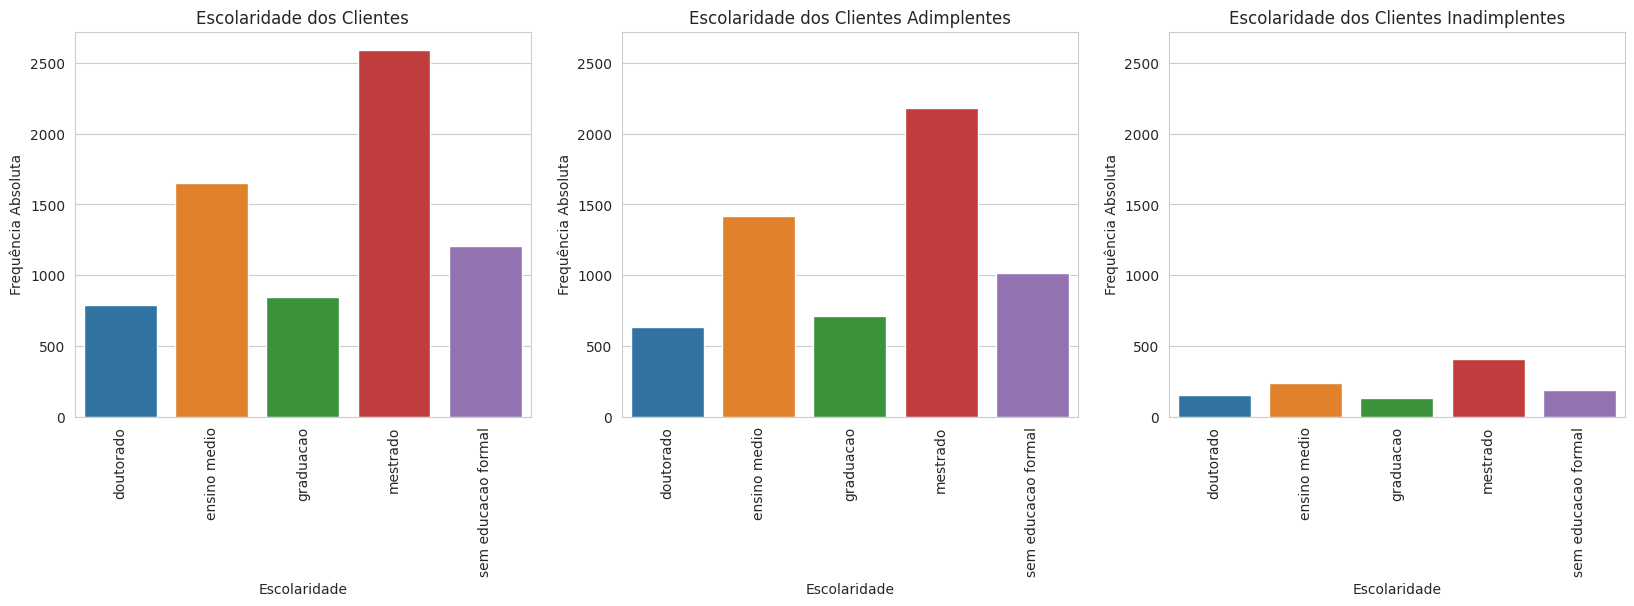

In [86]:
gerar_graficos_cate(coluna='escolaridade',titulos=['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes'])

> Analisando os gráficos que demonstram a diferença de escolaridade entre os clientes, percebemos que existe uma harmonia entre todos. Sendo assim, nenhuma informação concreta pode ser tirada nesta situação, tendo em vista que nenhum valor se destaca o suficiente para dividir os clientes adimplentes dos inadimplentes.

\

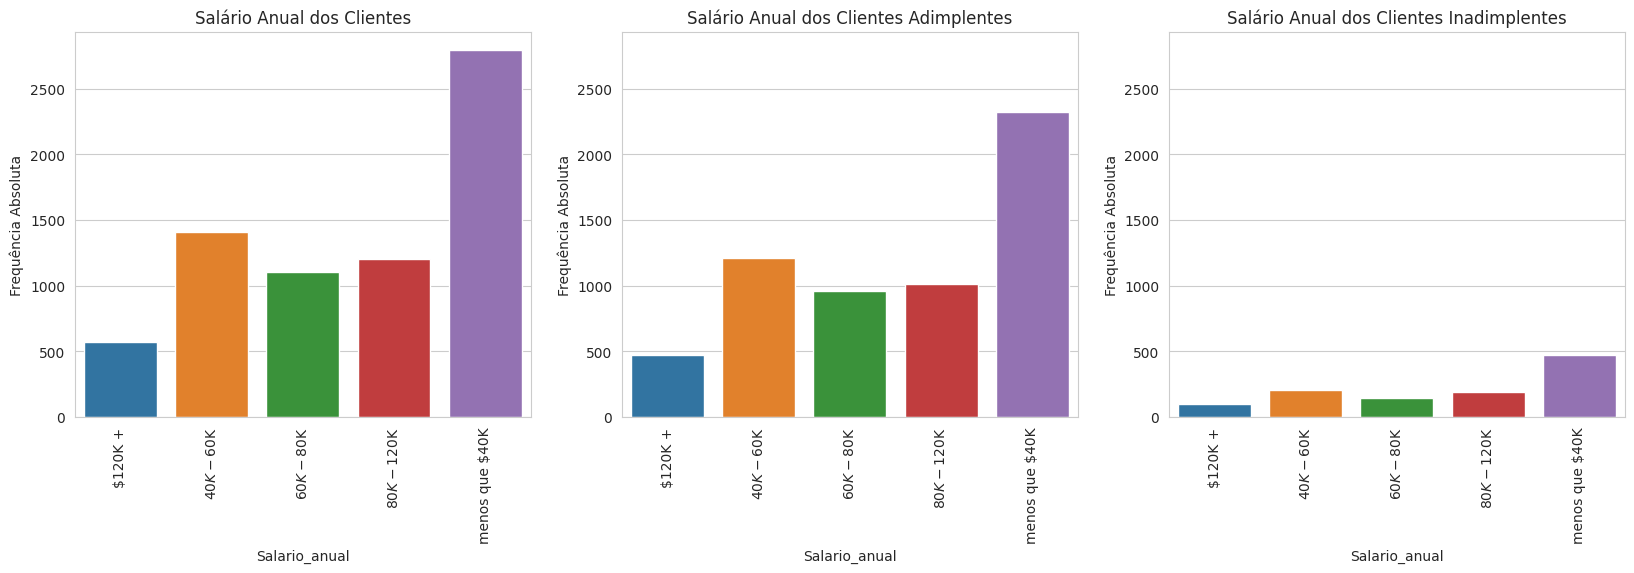

In [87]:
gerar_graficos_cate(coluna='salario_anual',titulos=['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes'])

\

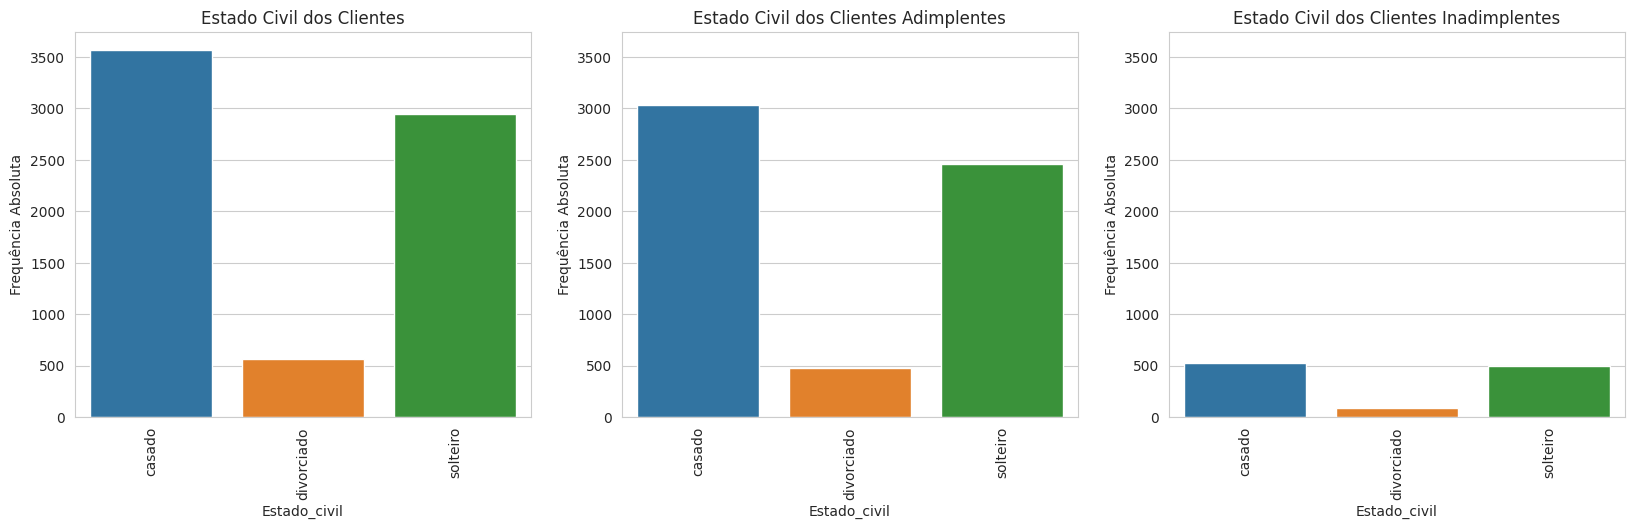

In [90]:
gerar_graficos_cate(coluna='estado_civil',titulos=['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes'])

> Neste gráfico, podemos perceber que a quantidade de clientes inadimplentes casados e solteiros se igualam, divergindo-se dos outros dois gráficos. Isso pode significar que os clientes casados possuem menor chance de se tornarem inadimplentes, mas, ainda assim, essa informação não é expressante o suficiente para definirmos um filtro.

\

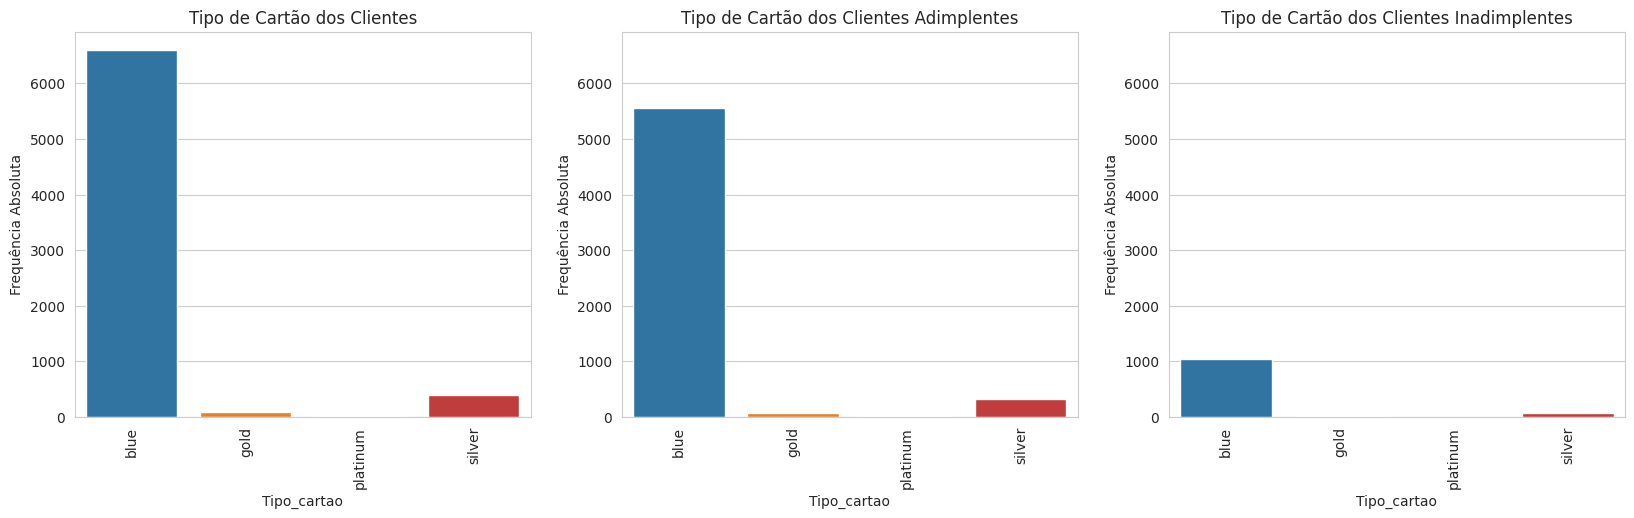

In [91]:
gerar_graficos_cate(coluna='tipo_cartao',titulos=['Tipo de Cartão dos Clientes','Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes'])

\

Analisando todos os gráficos categóricos, podemos perceber que não conseguimos tirar muitas informações deste grupo, pois não existe uma diferença significativa entre os gráficos de adimplentes e inadimplentes que possa nos ajudar a filtrar esses clientes.

## 6.2. Análise Numérica

In [97]:
df.drop(['id','default'], axis=1).select_dtypes('number').head(n=10)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24
8,37,3,36,5,0,2,22352.50,1350.14,24
9,48,2,36,6,3,3,11656.41,1441.73,32
12,56,1,36,3,0,6,11751.09,1539.95,17
14,57,2,48,5,2,2,2436.00,1570.23,29
16,48,4,36,6,3,2,30367.57,1671.12,27


In [117]:
def gerar_graficos_num(coluna: str, titulos: list) -> None:

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for data in [df, df_adimplentes, df_inadimplentes]:

    f = sns.histplot(x=coluna, data=data, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

Da mesma forma que foi feito na análise dos atributos categóricos, foi criada uma função para a construção dos gráficos de atributos numéricos.

> Para agilizar o processo, pode-se utilizar um laço **for** para gerar os gráficos de todos os atributos numéricos desejados

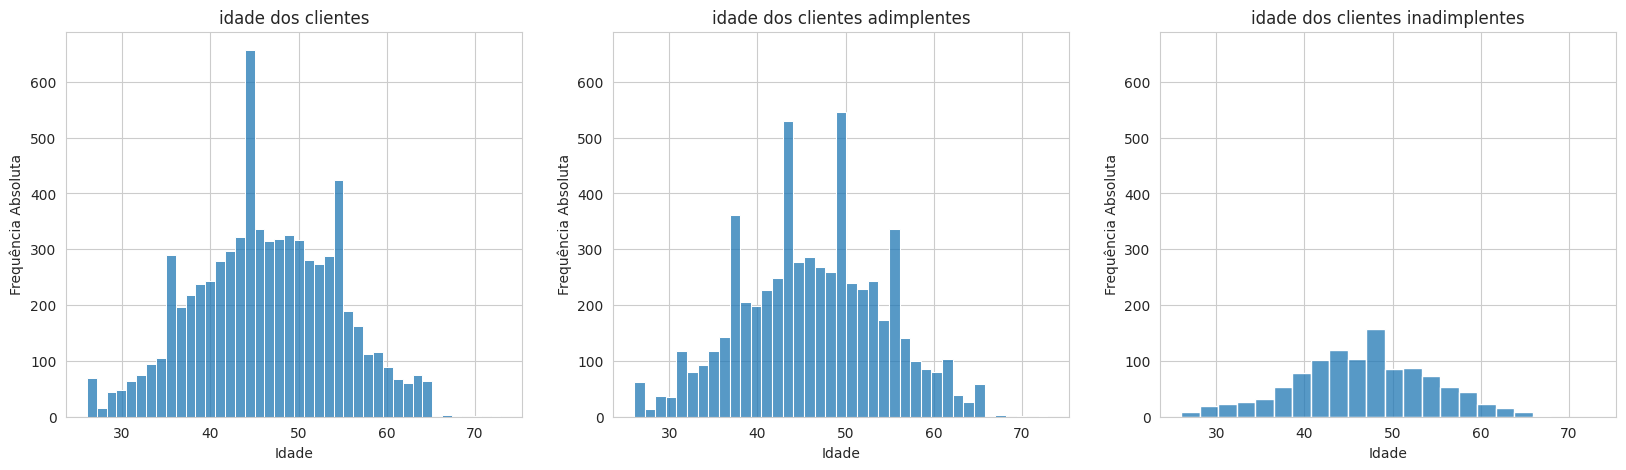

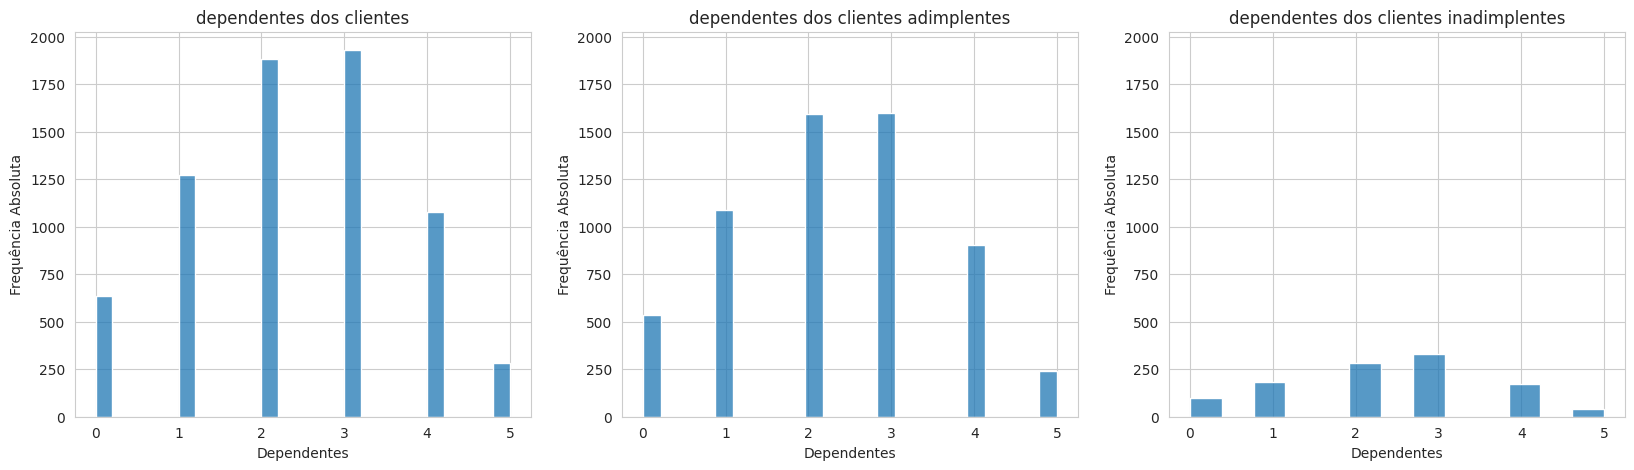

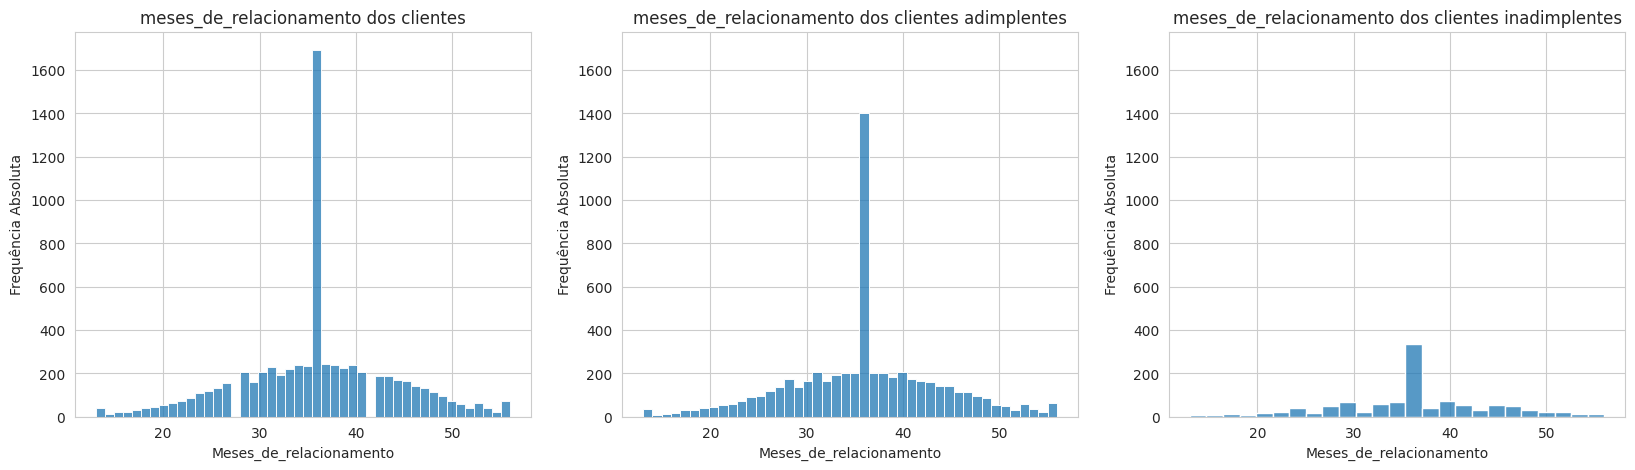

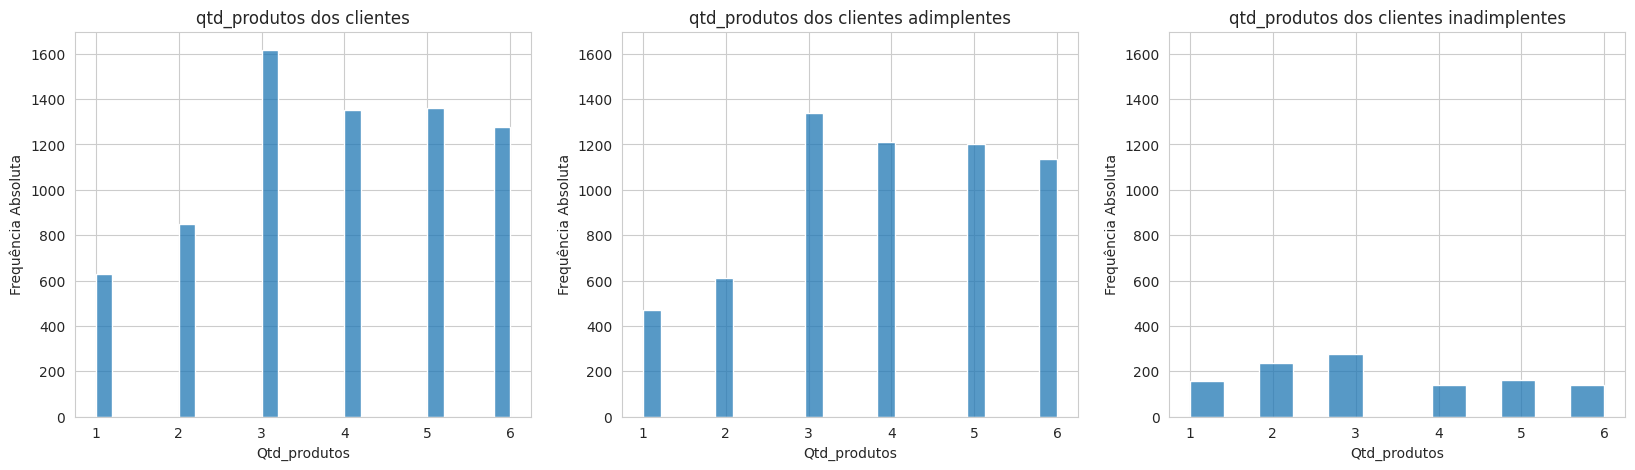

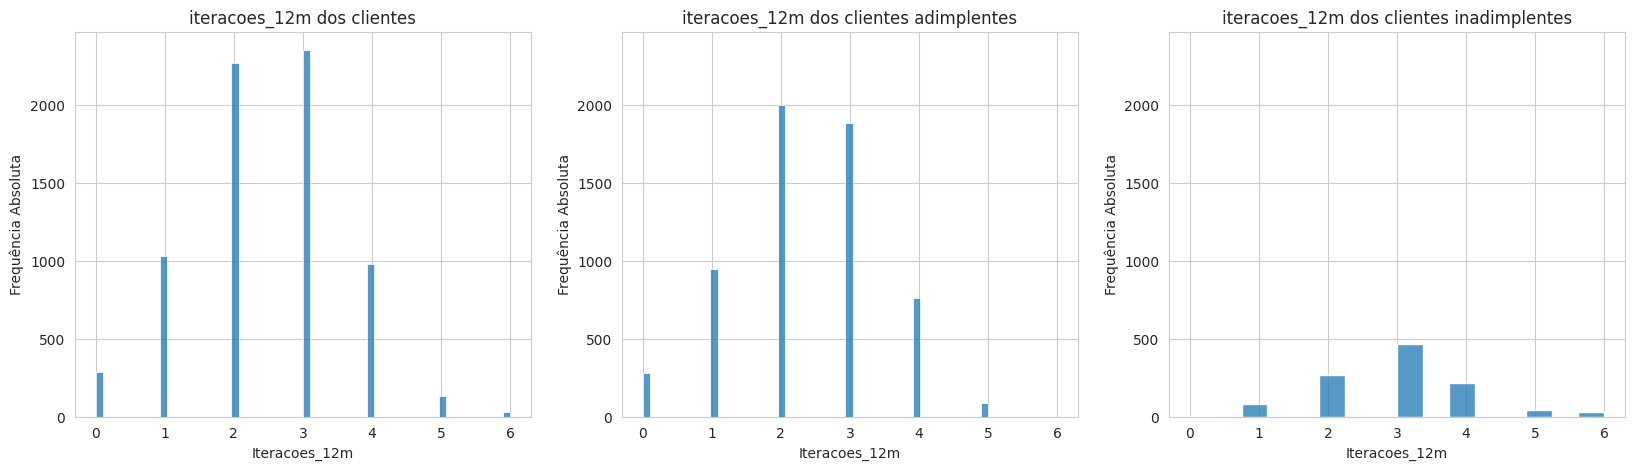

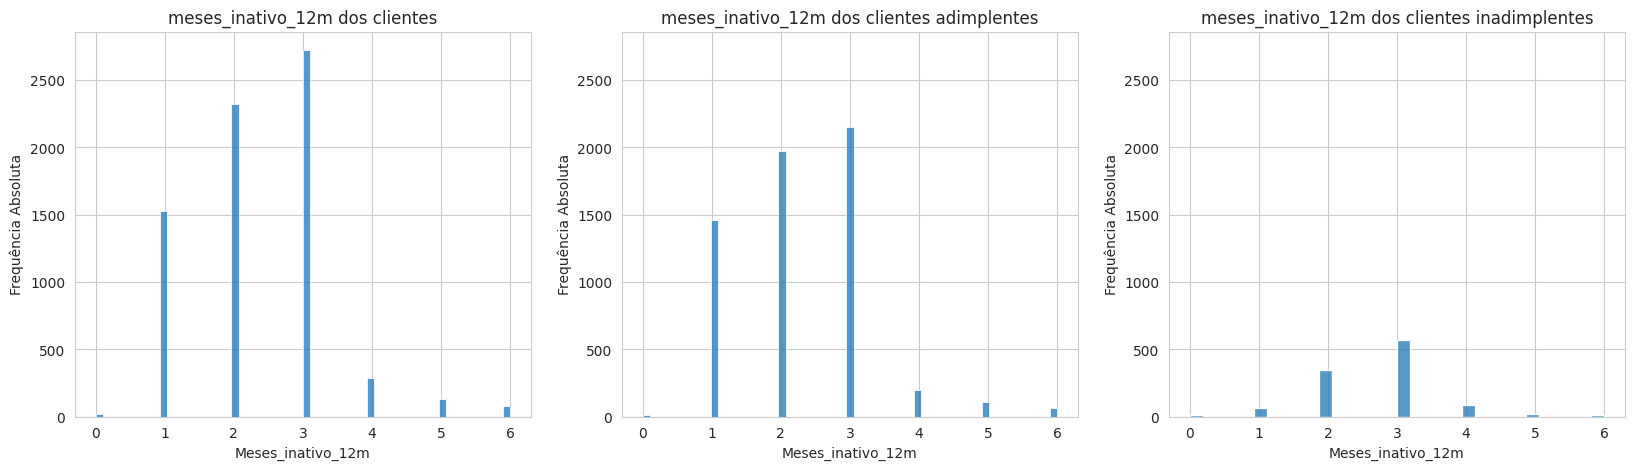

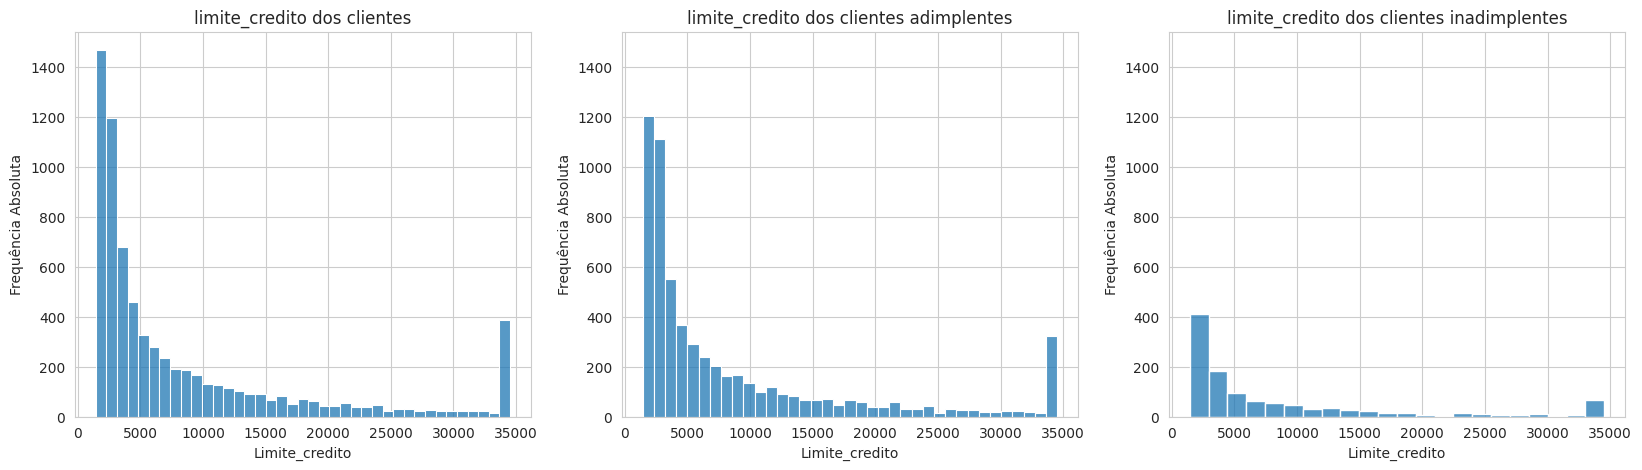

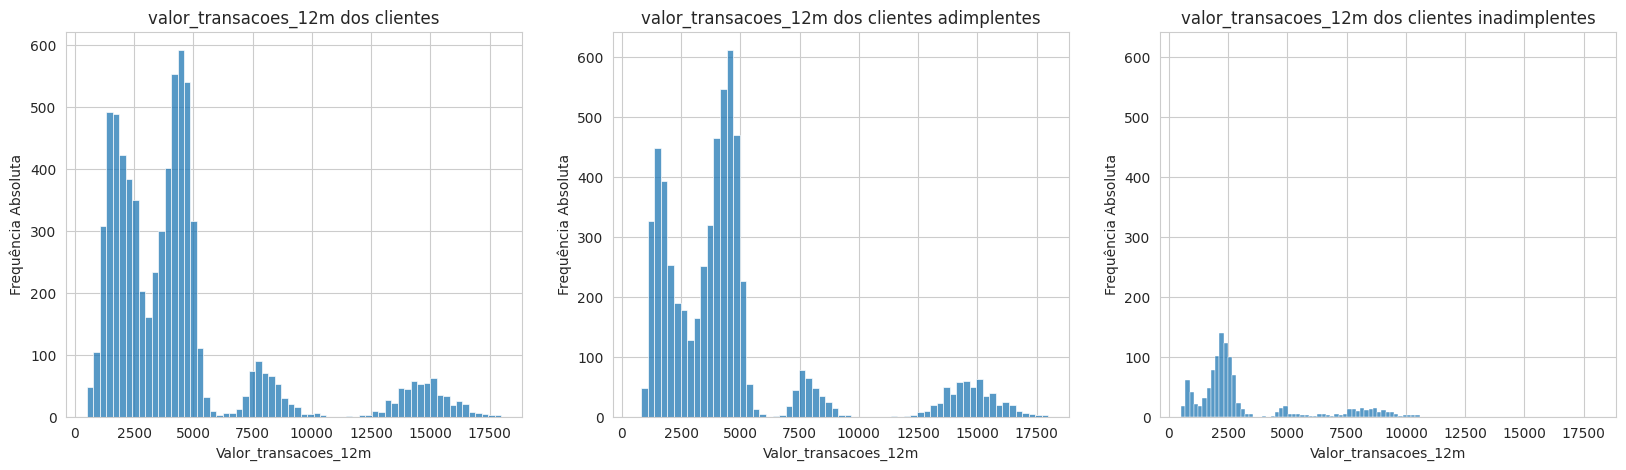

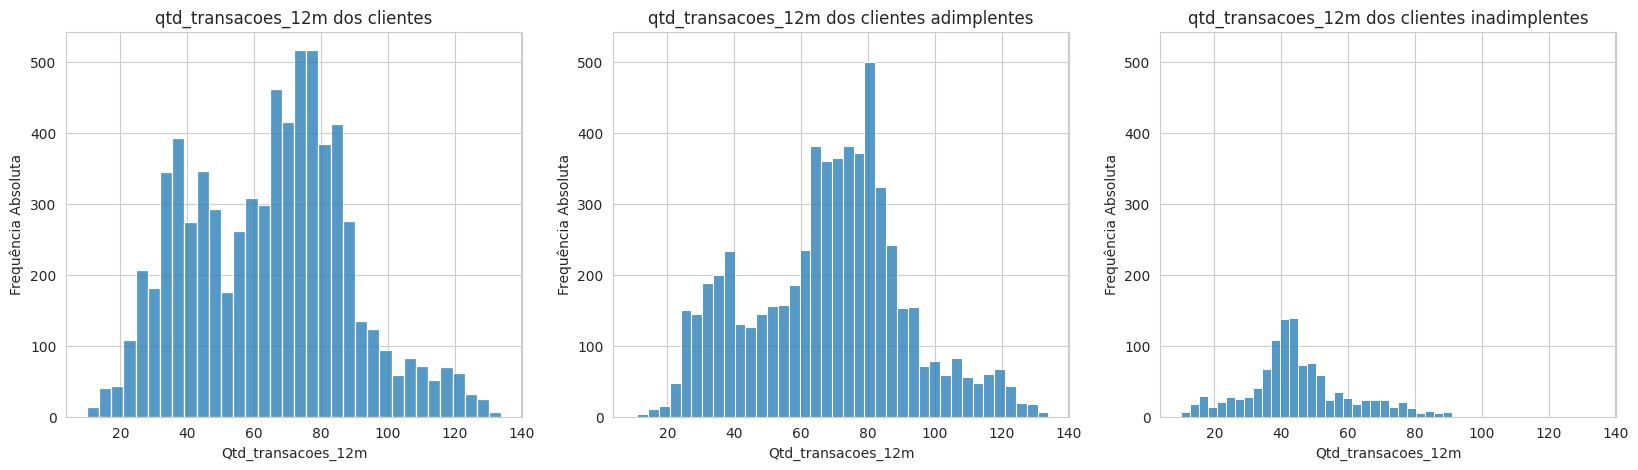

In [118]:
for coluna in df.drop(['id','default'], axis=1).select_dtypes('number').columns:
  gerar_graficos_num(coluna=coluna, titulos=[f'{coluna} dos clientes', f'{coluna} dos clientes adimplentes', f'{coluna} dos clientes inadimplentes'])

\

> Dos gráficos gerados, apenas 3 atributos contam com alguma diferença expressante o suficiente para criar um filtro, sendo eles:

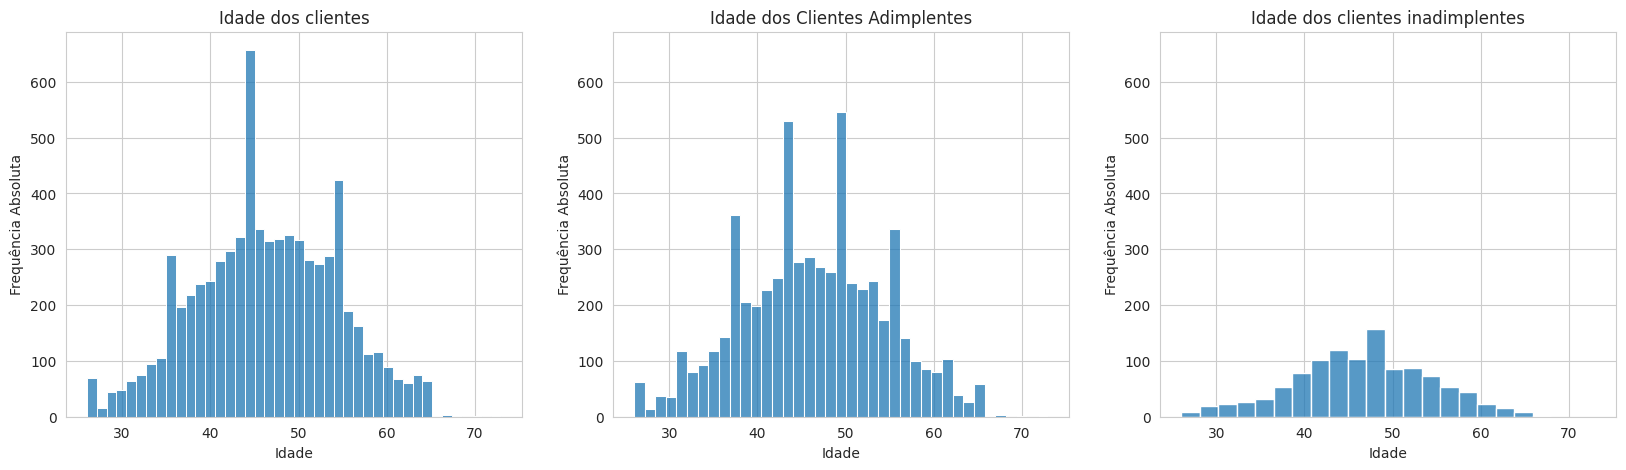

In [120]:
gerar_graficos_num(coluna='idade', titulos=['Idade dos clientes', 'Idade dos Clientes Adimplentes', 'Idade dos Clientes Inadimplentes'])

> No gráfico de idade, podemos perceber uma pequena concentração dos clientes inadimplentes entre os 42-48 anos. Porém, ainda não se pode tirar conclusões precisas, tendo em vista que os clientes Adimplentes também estão concentrados em idades próximas

\

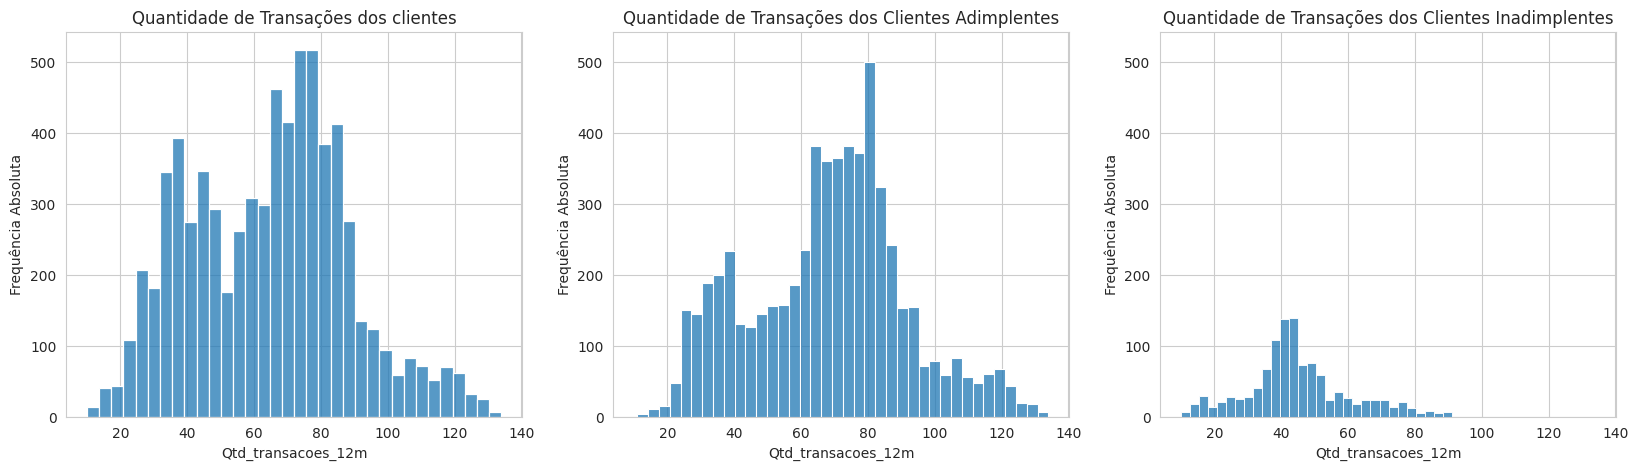

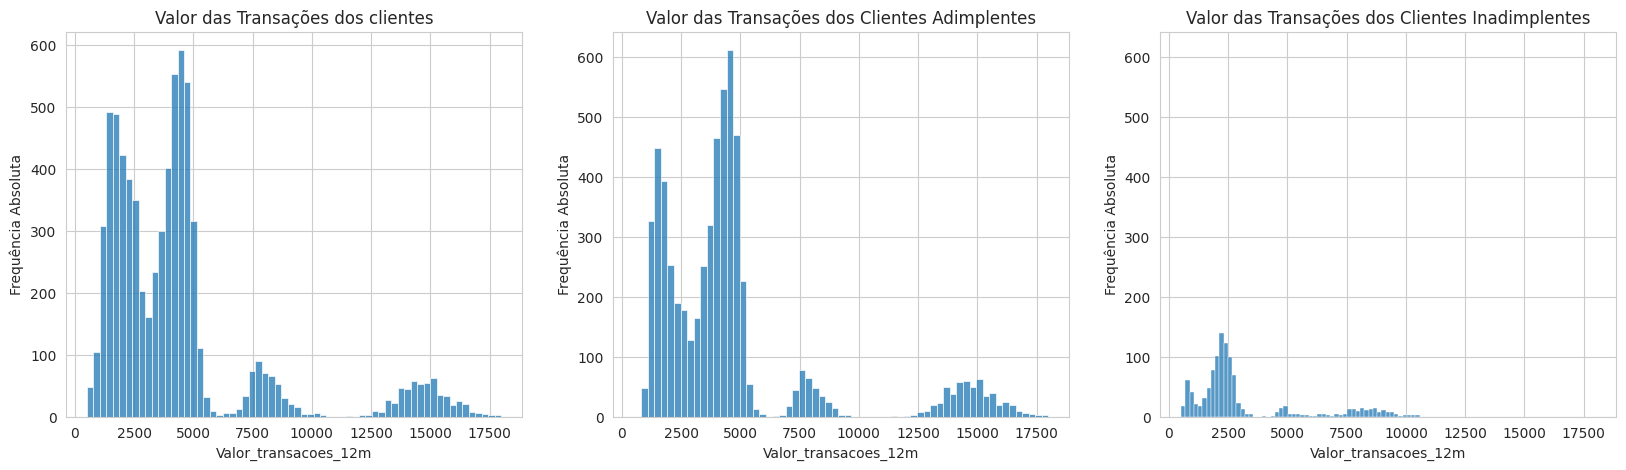

In [122]:
gerar_graficos_num(coluna='qtd_transacoes_12m', titulos=['Quantidade de Transações dos clientes', 'Quantidade de Transações dos Clientes Adimplentes', 'Quantidade de Transações dos Clientes Inadimplentes'])
gerar_graficos_num(coluna='valor_transacoes_12m', titulos=['Valor das Transações dos clientes', 'Valor das Transações dos Clientes Adimplentes', 'Valor das Transações dos Clientes Inadimplentes'])

Já nestes dois gráficos, podemos ver claramente uma diferença entre a concentração dos clientes adimplentes e inadimplentes.

> Os clientes inadimplentes tendem a estar em valores menores, sendo entre a quantidade de 20-60 transações anuais (com um pico no 40), e bem concentrados em valores de até R$2500 anuais.

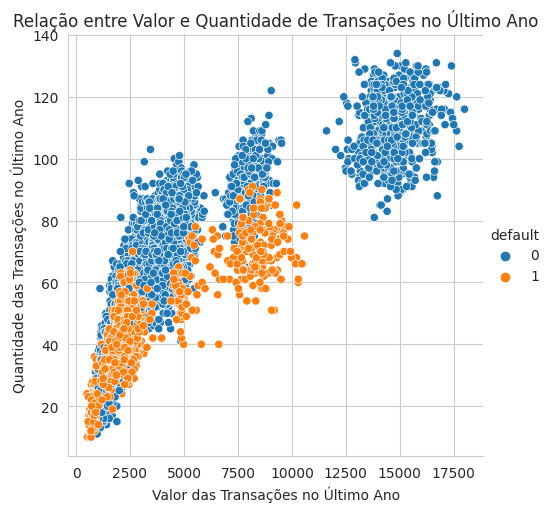

In [123]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

# 7\. Resumo dos Insights

---



Em tópicos, podemos resumir a análise (insights) da seguinte forma:

> Os clientes inadimplentes não se divergem dos adimplentes nos atributos categóricos, sendo eles **Escolaridade**, **Estado Civil**, **Salário Anual** e **Tipo de Cartão**.

> A diferença expressante dos clientes inadimplentes está concentrada em três atributos numéricos: **Idade**, **Quantidade de Transações Anuais** e **Valor Anual das Transações**.

>> Os clientes inadimplentes estão em maior quantidade entre os 42 - 48 anos;

>> Os clientes inadimplentes fazem poucas transações anualmente, entre 20 e 60, com um pico em 40 transações anuais;

>> Os clientes inadimplentes fazem transações de valores baixos em um período de 12 meses, com um pico em valor total igual a R$2500 por ano